In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alphabet-inc-stockprice-history-dataset/GOOG.csv


**In this notebook, i am going to show  how to predict future stock prices using a time series forcasting model "Facebook Prophet"**

In [3]:
#lets read dataset
df=pd.read_csv("/kaggle/input/alphabet-inc-stockprice-history-dataset/GOOG.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-14,1086.420044,1092.689941,1080.171997,1085.349976,1085.349976,1111500
1,2019-06-17,1086.280029,1099.180054,1086.280029,1092.500000,1092.500000,941600
2,2019-06-18,1109.689941,1116.390015,1098.989990,1103.599976,1103.599976,1386700
3,2019-06-19,1105.599976,1107.000000,1093.479980,1102.329956,1102.329956,1338800
4,2019-06-20,1119.989990,1120.119995,1104.739990,1111.420044,1111.420044,1262000
...,...,...,...,...,...,...,...
247,2020-06-08,1422.339966,1447.989990,1422.339966,1446.609985,1446.609985,1404200
248,2020-06-09,1445.359985,1468.000000,1443.209961,1456.160034,1456.160034,1409200
249,2020-06-10,1459.540039,1474.259033,1456.270020,1465.849976,1465.849976,1525200
250,2020-06-11,1442.479980,1454.474976,1402.000000,1403.839966,1403.839966,1991300


**Lets plot dataset to observe close values agains dates**

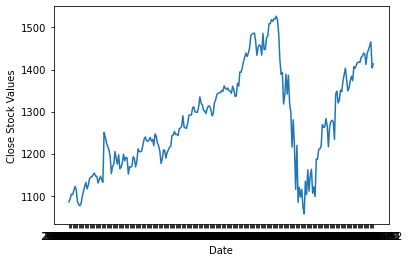

In [4]:
import matplotlib.pyplot as plt
x=df["Date"]
y=df["Close"]
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Close Stock Values')
plt.show()

**Now lets print some stastical variables such as mean, median,min, max , std using dataset's columns**

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,1277.602983,1291.581740,1265.481026,1279.384068,1279.384068,1.670034e+06
std,118.266870,117.603067,119.252503,118.375360,118.375360,7.745923e+05
min,1056.510010,1071.319946,1013.536011,1056.619995,1056.619995,3.475000e+05
25%,1182.619965,1197.753967,1172.717530,1187.964996,1187.964996,1.183225e+06
50%,1263.140015,1281.369995,1251.421509,1265.869995,1265.869995,1.448650e+06
75%,1361.827515,1375.259979,1349.077515,1362.720032,1362.720032,1.842075e+06
max,1525.069946,1532.105957,1521.400024,1526.689941,1526.689941,4.805800e+06


**Now build the model. we will use "dates" and "close" prices are as features for our model**

In [6]:
#making dataset using those two columns
data=df[["Date","Close"]]
#lets rename columns
data=data.rename(columns={"Date":"ds","Close":"y"})
data.head(5)

,ds,y
0,2019-06-14,1085.349976
1,2019-06-17,1092.500000
2,2019-06-18,1103.599976
3,2019-06-19,1102.329956
4,2019-06-20,1111.420044


**we will not split dataset into tain and test, instead we feed all data  to fit the model and ask the model to predict future stock price for 2021.
Lets import "prophet" model and build**

In [8]:
from fbprophet import Prophet
model=Prophet(daily_seasonality=True)
model.fit(data)

# # # # Lets plot predictions.
# # 1.We will ask model to predict future prices
# # 2.Then it will visualize the predictions

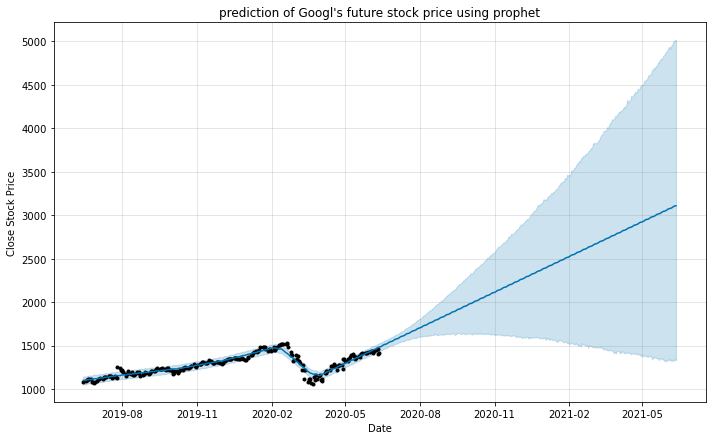

In [10]:
future=model.make_future_dataframe(periods=365) #specifying number of days for future
prediction=model.predict(future)
model.plot(prediction)

#plot predictions now
plt.title("prediction of Googl's future stock price using prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

# in above plot, black dots represent the traing period and blue line represents prediction confidence for future stock prices from aug-2020 to may-2021

**> it shows that google's stock price is going to be higher than before. but did u notice huge drop from 2020-02 to 2020-05, its due to corona pandemic.**

# Now lets plot the forecast components- trend, weekly, seasonality and daily components

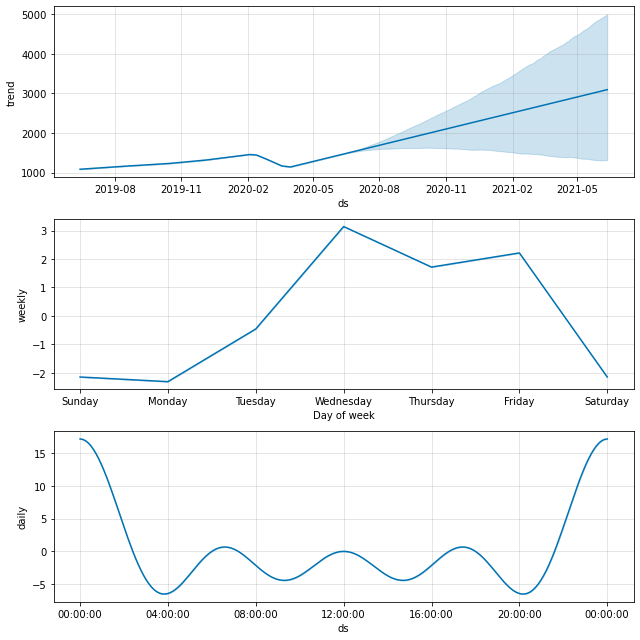

In [11]:
model.plot_components(prediction)
plt.show()

based on estimated trends,we can see that stock price is maximum on wednesdays